In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\user\Desktop\car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
data=data.replace("?",np.nan)
data=data.dropna()

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [5]:
data.shape

(112, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

<AxesSubplot:>

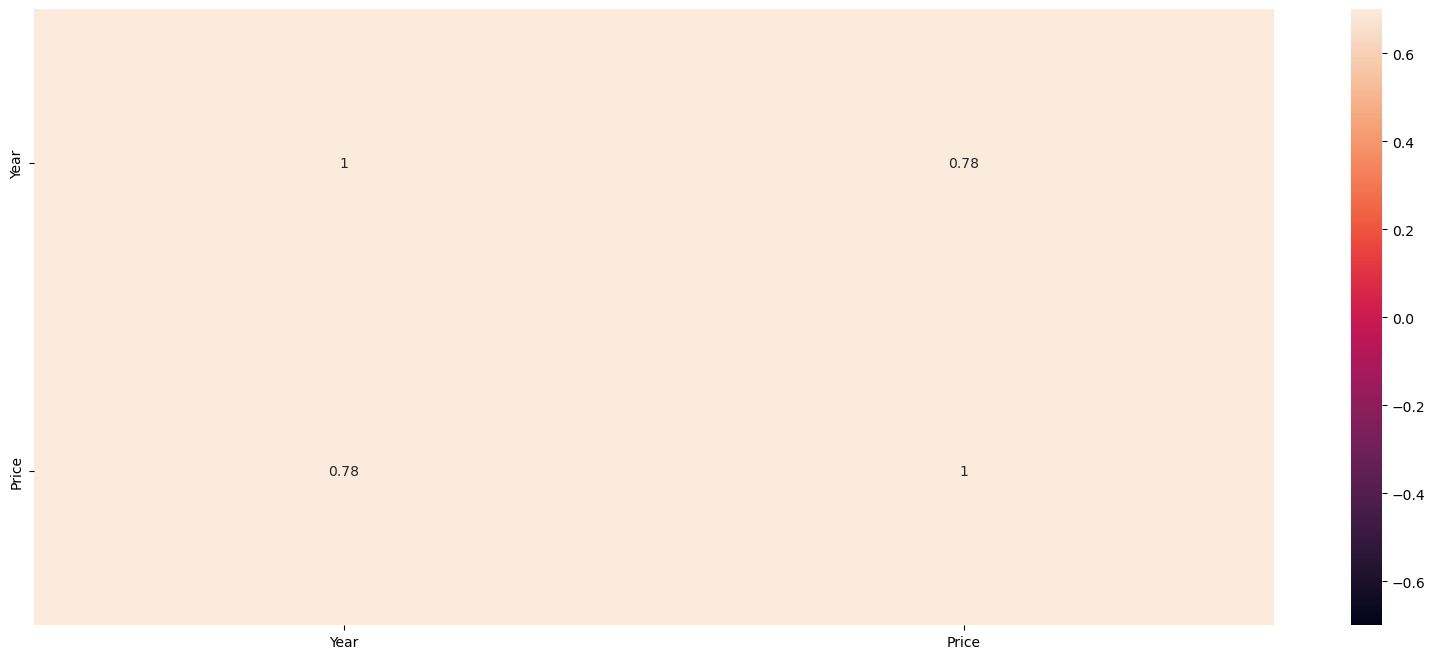

In [8]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmax=0.7,vmin=-0.7,annot=True)

## Linear Regression

In [9]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [14]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [15]:
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
print('MSE is:',mean_squared_error(y_test,y_pred))

MSE is: 4326906256.829671


In [17]:
print('R sq is:',r2_score(y_test,y_pred))

R sq is: 0.36759313425902185


## Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

In [19]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
y_pred1=lasso.predict(x_test)

In [20]:
mse_1=np.mean((y_pred1-y_test)**2)
print("MSE",mse_1)

MSE 4326859771.015768


### Above creating regression models both has almost same MSE values(lasso< linear),thus lasso is better than linear regression model.